<p> One type of machine learning problem is the classfication problem. The goal of classification is that given data about something, assign it a discrete, qualitative label. A classic classification problem is what a spam filter does. A programmer has a list of emails, each with data about it such as the number of words in the email or the number of capital letters in the title, and whether or not that email is considered by him to be spam. Then he come up with a model that relates the probability of an email being spam to the data. It is called "training the model", and that list called the training data. Then if a new email comes in, the model will calculate the probability of it being spam. If the email has a higher probability of being spam than not spam, it will be labeled "spam" and be delivered to the spam folder, and vice versa. </p>
<p> In practice, the training data often comes in a table, with each email ("instance") being a row and each parameter being a column. One of the columns will be the label you want to assign, which is called the target. A new email, whether or not it is spam is unknown, is also an instance, except with the target column blank. The problem is then to fill this column. Conversely, any problem that asks you to fill an empty column of a table for a certain instance with a discrete label is a classification problem. </p>
<img src="iris.png">
<p> In our example, we will use the famous Iris flower dataset. The table contains the length and width of the sepal and petal of samples of flowers from the Iris genus collected in an area, as well as the species name of the flower, determined by a qualified biologist. Then imagine somebody goes to the same area, finds a flower and measures the length and width of its sepal and petal. But that person cannot tell the species of that flower. Then a classification problem is to determine, from the measurement data, what species the flower most likely is. </p>

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

As usual, we start by creating a Pandas dataframe from a csv file in the same folder as this jupyter notebook.

In [3]:
df = pd.read_csv('iris.csv')
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
145,6.5,3.0,5.5,1.8,Iris-virginica
146,7.7,2.6,6.9,2.3,Iris-virginica
147,6.0,2.2,5.0,1.5,Iris-virginica
148,6.9,3.2,5.7,2.3,Iris-virginica


We can use Seaborn to plot a scatter chart to visualize the data. Let's say I pick the first 2 columns, because we cannot plot a 4-dimensional chart.

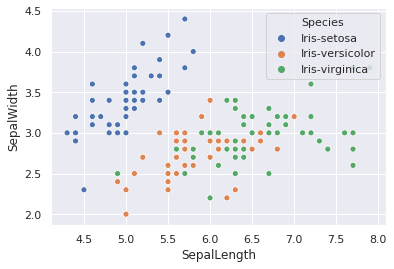

In [6]:
import seaborn as sns
sns.set()
sns.scatterplot(x="SepalLength",y="SepalWidth",data=df,hue="Species")

Let's say there is a flower, of which the sepal length is 6.4, sepal width is 3.5, petal length is 5.3 and petal width is 2.2, and we want to use ML to predict what its species is. We can use \[6.4,3.5,5.3,2.2\] to represent the data, the ordering following the order of the columns in the dataframe. 

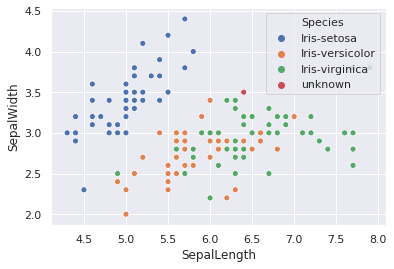

In [9]:
df_test = pd.Series([6.4,3.5,5.3,2.2,'unknown'],index=df.columns)  # add a fictional new data point, whose species is unknown
df1 = df.append(df_test,ignore_index=True)  # don't worry about code in this cell, it's not part of standard ML workflow
sns.scatterplot(x="SepalLength",y="SepalWidth",data=df1,hue="Species")

From the scatterplot we see the unknown data point is rather close to virginica, so we might expect the result is virginica, but we have to test it.

Then we import the Scikit-learn package, the most popular ML package in Python. There are many algorithms that are suitable for use in this problem. We'll use a simple one called the K-nearest neighbors classifier.

Now there is a debate in the ML community on whether understanding the different algorithms is necessary, or if simply knowing how to use the algorithms is enough. Here we will take the latter approach. Generally, the code for training a model is <br>
<code><i>variable_name = classifier_name(parameter=parameter_value)</i>.fit(X,y)</code> <br>
You can choose any <i>variable_name</i> as you like, but conventionally we will always use <code>clf</code> for any classification. You can specify the value of any <i>parameter</i> used in a particular model, but most of the time you can also use the default values by not filling it. <code>X</code>, the first parameter of <code>fit</code>, is a 2-dimensional array, or multiple columns in a dataframe, while <code>y</code>, the second parameter, is the target, which is a one-dimensional array or one column in the dataframe.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
X = df.drop(columns=['Species']) # dataframe except the target
y = df['Species'] # target
clf = KNeighborsClassifier().fit(X,y)

Since we want to predict the species of a flower, the species column is the target, and we use the <code>drop</code> function to drop the target from the dataframe. <code>df['species']</code> selects the column that is the target. Now that the model is trained, we'll use it to predict:

In [11]:
clf.predict([[6.2,3.2,5.3,2.2]])  # note the double square brackets

array(['Iris-virginica'], dtype=object)

Indeed the model predicts the flower of unknown species is a virginica.

As I mentioned, there are other algorithms that can do this classification problem, and it really is a matter of taste which algorithm you use. And as mentioned the code is very similar. For example the logistic regression:

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X,y)
clf.predict([[6.2,3.2,5.3,2.2]])

/home/han/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/han/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array(['Iris-virginica'], dtype=object)

And the support vector machine classification:

In [18]:
clf = SVC().fit(X,y)
clf.predict([[6.2,3.2,5.3,2.2]])

array(['Virginica'], dtype=object)

Read the documentation at https://scikit-learn.org/stable/supervised_learning.html#supervised-learning for more algorithms and their explanations if you are interested!

Exercise: Create a model predicting wine class using the wine dataset.